# Lab 24 - Hypothesis testing with multiple categories

We will learn how to test hypotheses when our categorical data has more than two categories.  To be specific, we will learn how to conduct a statistical test to see if our data came from a certain distribution with more than two categories (classes).

We will look at jury panel data from 2009 and 2010 collected by the American Civil Liberties Union (ACLU).  The total number of people who reported for jury duty in those years was 1,452.  See [11.2 Multiple Categories](https://www.inferentialthinking.com/chapters/11/2/Multiple_Categories.html) for more information.

First, let's import the necessary libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### Section 1: Review of hypothesis testing

A *hypothesis test* tries to decide which of two views or models of how the data was generated or arose is correct.

#### Step 1: The hypotheses
The two hypotheses or views or models of the where the data came from are:

* the *null hypothesis* explains exactly how the data could be generated randomly, and we can simulate data from this distribution, called the *null distribution*
* the *alternative hypothesis* says some reason other than chance made the data different from the null hypothesis model.

We are usually trying to show that the alternative hypothesis is most likely.

#### Step 2:  The test statistic

The test statistic is some number we can compute from the data.  Usually statisticians have already figured out the best test statistic to use for a certain type of problem.

#### Step 3:  Estimate the distribution of the test statistic assuming the null hypothesis is true

In this step, we generate random samples using the assumptions of the null hypothesis, and compute the test statistic for each one.  A histogram of these test statistics estimates the distribution of the test statistic when the null hypothesis is true.

In this class, we will always use code to estimate this distribution, but in a traditional statistics class, you might learn that this distribution is a well-known distribution, like the normal distribution, and use that information in Step 4 instead of the estimate.

#### Step 4: Conclusion

Compare the test statistic calculated from your data to the distribution of test statistics computed from samples from the null distribution.  

* If the data test statistic looks like it came from this distribution, then the null hypothesis might be true.  We say we *fail to reject the null hypothesis*.  

* If the data test statistic looks unlikely to have come from this distribution, then the null hypotheis is likely false.  We say we *reject the null hypothesis*.

For this lab:
* the null hypothesis is that the distribution of the jury panels is the same as the eligible distribution.

* the alternative hypothesis is that the distribution of the jury panels and the eligible distribution are different 

### Section 2:  Exploratory Data Analysis

We can create a dataframe with the jury panel data as shown below. 

In [3]:
# create a dictionary listing each column, followed by the column values in a list
jury_data = {"Eligible":[0.15, 0.18, 0.12, 0.54, 0.01],
             "Panels":[0.26, 0.08, 0.08, 0.54, 0.04]}
# pass the dictionary into the dataframe creation function as a parameter
# also pass in labels for the rows
jury = pd.DataFrame(data = jury_data, index = ["Asian","Black","Latino/a","White","Other"])

What do you think are the columns and rows of the new dataframe?  Check your answer by displaying the dataframe `jury`. 

In [4]:
jury

,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino/a,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


We will now make a bar chart of the two columns of data.  If we want to use Seaborn, we would have to convert our data from wide-form to long-form.  Instead, we will use the MatPlotLib: `jury.plot(kind = "bar")`

<AxesSubplot:>

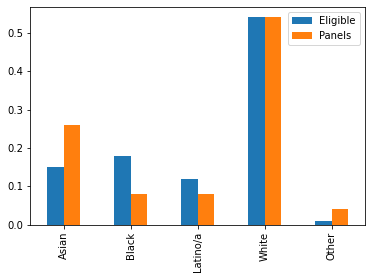

In [5]:
jury.plot(kind = "bar")

How does the distribution of eligible jurors compare with the distribution of the jury panels?

### Section 3: Sampling from the eligible distribution

To know whether the variation between the distributions is just the result of chance, we can compute a random sample from the eligible distribution and compare it with the panel distribution.

First we create a variable for the eligible population and distribution.

In [6]:
population = ["Asian","Black","Latino/a","White","Other"]
pop_prob = [0.15, 0.18, 0.12, 0.54, 0.01]

In [32]:
population

['Asian', 'Black', 'Latino/a', 'White', 'Other']

We can create a sample from this population.  The sample should be the same size as our data.

In [7]:
sample = np.random.choice(population,p = pop_prob,size = 1452)
sample

array(['White', 'White', 'White', ..., 'White', 'White', 'Black'],
      dtype='<U8')

Compute the value counts for the sample (you will have to make it a Pandas Series first).  Since we only have the probabilities of the eligible population, we want to compute the value counts as probabilities as well.  We can do this by adding the parameter `normalize = True`.  Save the probabilities of the sample in the variable `sample_probs`.

In [8]:
sample_probs = pd.Series(sample).value_counts(normalize = True)
sample_probs

White       0.530992
Black       0.192149
Asian       0.152204
Latino/a    0.116391
Other       0.008264
dtype: float64

<details> <summary>Answer:</summary>
    <code>sample_probs = pd.Series(sample).value_counts(normalize = True)
</code>
</details>

Next we will create a new column in our dataframe called `Random` that contains the probabilities from our random sample.  To do this, type `jury["Random"] = sample_probs` below and run it.

In [9]:
jury["Random"] = sample_probs

Display the `jury` dataframe again to check that the column was added.

In [10]:
jury

,Eligible,Panels,Random
Asian,0.15,0.26,0.152204
Black,0.18,0.08,0.192149
Latino/a,0.12,0.08,0.116391
White,0.54,0.54,0.530992
Other,0.01,0.04,0.008264


Plot the bar chart of the dataframe again, and the new column will be included.

<AxesSubplot:>

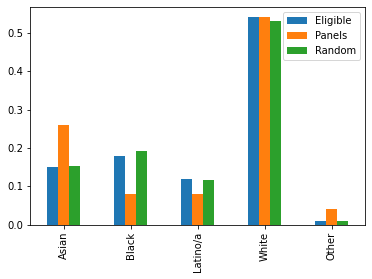

In [11]:
jury.plot(kind = "bar")

How does the distribution of the random sample compare to the eligible distribution?  To the panel distribution?

### Section 4: Computing the test statistic

Let's compare the panels distribution to the eligible distribution quantitatively using hypothesis testing.  We need to choose a statistic to simulate, called the *test statistic*.  In this problem, we will use something called the *Total Variation Distance (TVD)* as the test statistic.  The TVD measures the difference between two distributions, and is computed by:
* taking the absolute value of the difference in probability between the two distributions for each category 
* adding up these absolute values and dividing by 2

First we will compute the TVD between the panels and eligible distribution:

In [12]:
jury["Difference"] = jury["Panels"] - jury["Eligible"]
jury

,Eligible,Panels,Random,Difference
Asian,0.15,0.26,0.152204,0.11
Black,0.18,0.08,0.192149,-0.10
Latino/a,0.12,0.08,0.116391,-0.04
White,0.54,0.54,0.530992,0.00
Other,0.01,0.04,0.008264,0.03


What is the sum of the difference column?  

To fix this, we will take the absolute differences between probabilities.

In [13]:
jury["Absolute Difference"] = np.abs(jury["Difference"])
jury

,Eligible,Panels,Random,Difference,Absolute Difference
Asian,0.15,0.26,0.152204,0.11,0.11
Black,0.18,0.08,0.192149,-0.10,0.10
Latino/a,0.12,0.08,0.116391,-0.04,0.04
White,0.54,0.54,0.530992,0.00,0.00
Other,0.01,0.04,0.008264,0.03,0.03


What does this do?

Now take the sum of the absolute difference column.  You can use the same command as when we took the sum of a filter.

In [14]:
jury["Absolute Difference"].sum()

0.28

<details> <summary>Answer:</summary>
    <code>jury["Absolute Difference"].sum()
</code>
</details>

Notice this sum is twice either the positive or negative count, so we divide it by two.  This quantity is the *total variation distance (TVD)* between the distribution of ethnicity in the eligible juror population and the panel.

In [15]:
data_tvd = jury["Absolute Difference"].sum()/2
data_tvd

0.14

We could have done this calculation in one line of code:
`np.abs(jury["Panel"] - jury["Eligible"]).sum()/2`
Try it below.

In [16]:
np.abs(jury["Panels"] - jury["Eligible"]).sum()/2

0.14

### Section 5: Distribution of the test statistic and conclusion

Next we want to understand the distribution of the test statistic (here, the TVD) if the panels were actually from the eligible distribution.  To do this, we want to simulate random samples from the eligible distribution and compute the total variation distance between the sample and eligible distribution.

First compute for one random sample, and compute the TVD between its probabilities and the eligible distribution.

In [27]:
population = ["Asian","Black","Latino/a","White","Other"]
pop_prob = [0.15, 0.18, 0.12, 0.54, 0.01]

sample = np.random.choice(population,p = pop_prob,size = 1452)
sample_probs = pd.Series(sample).value_counts(normalize = True)
jury["Random"] = sample_probs
random_tvd = np.abs(jury["Random"] - jury["Eligible"]).sum()/2
random_tvd

0.025234159779614324

<details><summary>Answer:</summary>
<code>
sample = np.random.choice(population,p = pop_prob,size = 1452)
sample_probs = pd.Series(sample).value_counts(normalize = True)
tvd = np.abs(sample_probs - jury["Eligible"]).sum()/2
</code>
</details>

Now we want to repeat this process many times, and make a histogram of the difference TVD values.  First, use a loop to generate many samples and compute the TVD to the eligible population.

In [28]:
random_tvd_list = []

for i in range(1000):
    sample = np.random.choice(population,p = pop_prob,size = 1452)
    sample_probs = pd.Series(sample).value_counts(normalize = True)
    jury["Random"] = sample_probs
    random_tvd = np.abs(jury["Random"] - jury["Eligible"]).sum()/2
    random_tvd_list.append(random_tvd)

In [29]:
random_tvd_list

[0.004104683195592293,
 0.03550964187327822,
 0.022947658402203856,
 0.011790633608815385,
 0.015371900826446287,
 0.017134986225895352,
 0.008044077134986224,
 0.01236914600550966,
 0.015013774104683165,
 0.02939393939393934,
 0.022121212121212108,
 0.0028099173553719292,
 0.017327823691460006,
 0.019504132231405,
 0.013388429752066142,
 0.024573002754820897,
 0.019559228650137785,
 0.007796143250688705,
 0.01724517906336085,
 0.020936639118457348,
 0.00768595041322312,
 0.010440771349862234,
 0.015096418732782346,
 0.024903581267217603,
 0.012424242424242438,
 0.02220385674931128,
 0.017685950413223087,
 0.01749311294765842,
 0.012561983471074383,
 0.011239669421487613,
 0.01388429752066115,
 0.006942148760330604,
 0.009256198347107447,
 0.013002754820936605,
 0.0225619834710744,
 0.02476584022038572,
 0.01636363636363636,
 0.014573002754820905,
 0.010275482093663902,
 0.009917355371900829,
 0.013553719008264496,
 0.02250688705234156,
 0.010110192837465518,
 0.01404958677685951,
 0.0

<details><summary>Answer:</summary>
<code>
tvd_list = []
for x in range(10000):
    sample = np.random.choice(population,p = pop_prob,size = 1452)
    sample_probs = pd.Series(sample).value_counts(normalize = True)
    tvd = np.abs(sample_probs - jury["Eligible"]).sum()/2
    tvd_list.append(tvd)
</code>
</details>

Next make the histogram of these simulated test statistics (the TVDs).

Text(0, 0.5, '# of random samples')

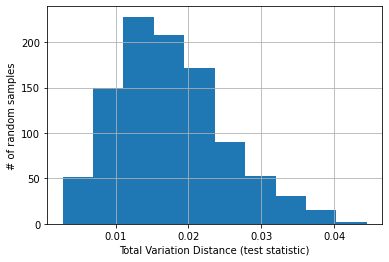

In [31]:
pd.Series(random_tvd_list).hist()
plt.xlabel("Total Variation Distance (test statistic)")
plt.ylabel("# of random samples")

<details><summary>Answer:</summary>
<code>
pd.Series(tvd_list).hist(density = True)
</code>
</details>

Does the test statistic computed from the data look like it comes from this distribution?